# 常见图像绘制
在今天的课程中我将一起学习其他常见图像的绘制。
![](./picture/11-1.png)
## 柱状图
![](./picture/11-2.png)
柱状图适用场合是二维数据集（每个数据点包括两个值x和y），但只有一个维度需要比较。例如：年销售额就是二维数据，”年份”和”销售额”就是它的两个维度，但只需要比较”销售额”这一个维度。  
柱状图利用柱子的高度，反映数据的差异。肉眼对高度差异很敏感，辨识效果非常好。  
我们使用的是电影票房数据，数据的参考链接为[http://58921.com/alltime](http://58921.com/alltime)
我们随机从中选取了6个数据，并将电影的名字和总票房数作为实践数据。  
```
x = ['流浪地球','疯狂的外星人','飞驰人生','大黄蜂','熊出没·原始时代','新喜剧之王']
y = [38.13,19.85,14.89,11.36,6.47,5.93]
```
现在，需要绘制一张柱形图，用来描述每个电影的票房总数之间的对比。下面，我们就来一起体验一下这张图是如何绘制的。  
经过前面的学习，我们知道绘制折线图使用plt.plot()方法，而绘制柱形图我们使用plt.bar()函数:  
```
plt.bar(x,height,width,color)
```
先来了解一下函数的常用参数：   
代码参数   
x：记录x轴上的标签  
height：记录每个柱形的高度  
width：设置柱形的宽度  
color：设置柱形的颜色，传入颜色值的列表，例如：['blue','green','red']。  
根据上面的数据和方法，我们尝试一下绘制出柱状图：  

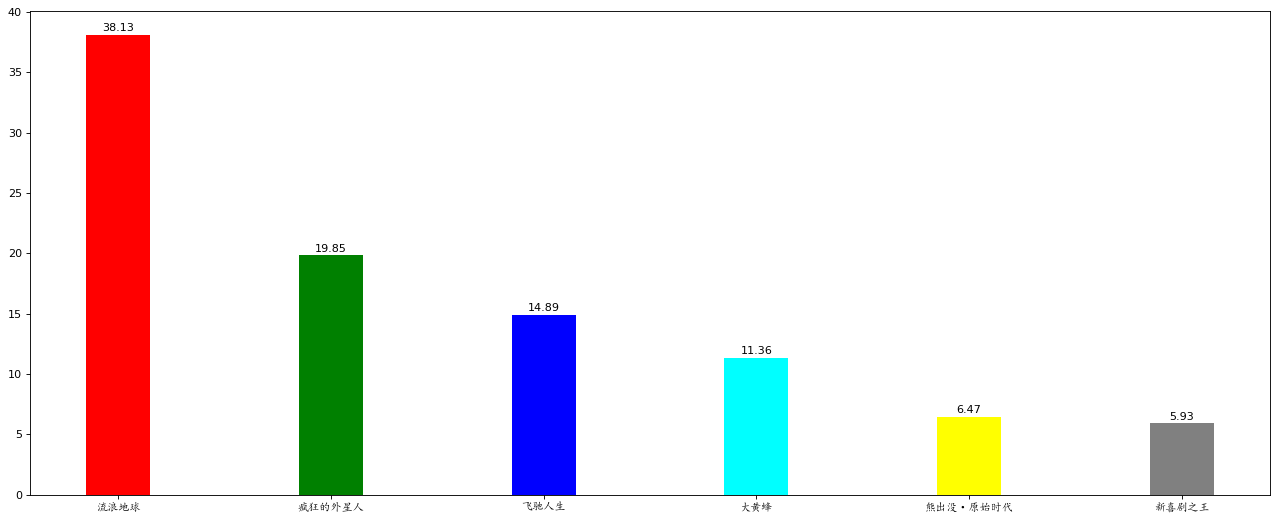

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager
a = ['流浪地球','疯狂的外星人','飞驰人生','大黄蜂','熊出没·原始时代','新喜剧之王']
b = [38.13,19.85,14.89,11.36,6.47,5.93]

my_font = font_manager.FontProperties(fname='./data/simkai.ttf')
plt.figure(figsize=(20,8),dpi=80)

# 绘制柱状图
rects = plt.bar(a,b,width=0.3,color=['red','green','blue','cyan','yellow','gray'])
plt.xticks(a,fontproperties=my_font)
plt.yticks(range(0,41,5),range(0,41,5))

# 在条形图上加标注(水平居中)
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.3, str(height),ha="center")
plt.show()

我们得到了每个电影对应的票房柱形图，每个柱形的高度分别记录着票房的值。  
但是，细心的同学会注意到，我们将柱形的高度数据标注在了柱形的上方。没错，我们使用了plt.text( )函数为每个柱形标注高度数值。
代码片段  
```
plt.text(x,y,s,ha,va)
```
函数中前两个参数分别为标注数据的坐标，x和y坐标，参数s记录标注的内容，参数ha和va分别用于设置水平和垂直方向的对齐方式。   
rects是plt.bar()的返回值，里面包含了每一个柱形为每个柱形添加数值标注需要逐个添加，所以我们设置了一个循环来完成这项操作。   
代码片段
```
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.3, str(height),ha="center")
```
通过get_height()、get_x()、rect.get_width()等方法可以分别拿到柱形图的高度，左侧边的x值，柱子的宽度。
然后，使用plt.text添加上文字，这样就可以清晰地看出每个柱形的高度了。
## 直方图
![](./picture/11-3.png)
直方图一般用来描述等距数据，柱状图一般用来描述名称（类别）数据或顺序数据。直观上，直方图各个长条形是衔接在一起的，表示数据间的数学关系；条形图各长条形之间留有空隙，区分不同的类。  
绘制直方图使用plt.hist()函数：  
代码片段
```
plt.hist(data, bins, facecolor, edgecolor)
```
先来了解一下函数的常用参数：  
常用参数  
data：绘图用到的数据  
height：直方图的条形数目  
bins：设置柱形的宽度  
facecolor：矩形的填充颜色  
edgecolor：条形的边框颜色  
现有250部电影的时长，希望统计出这些电影时长的分布状态(比如时长为100分钟到120分钟电影的数量，出现的频率信息，你应该如何呈现这些数据？  


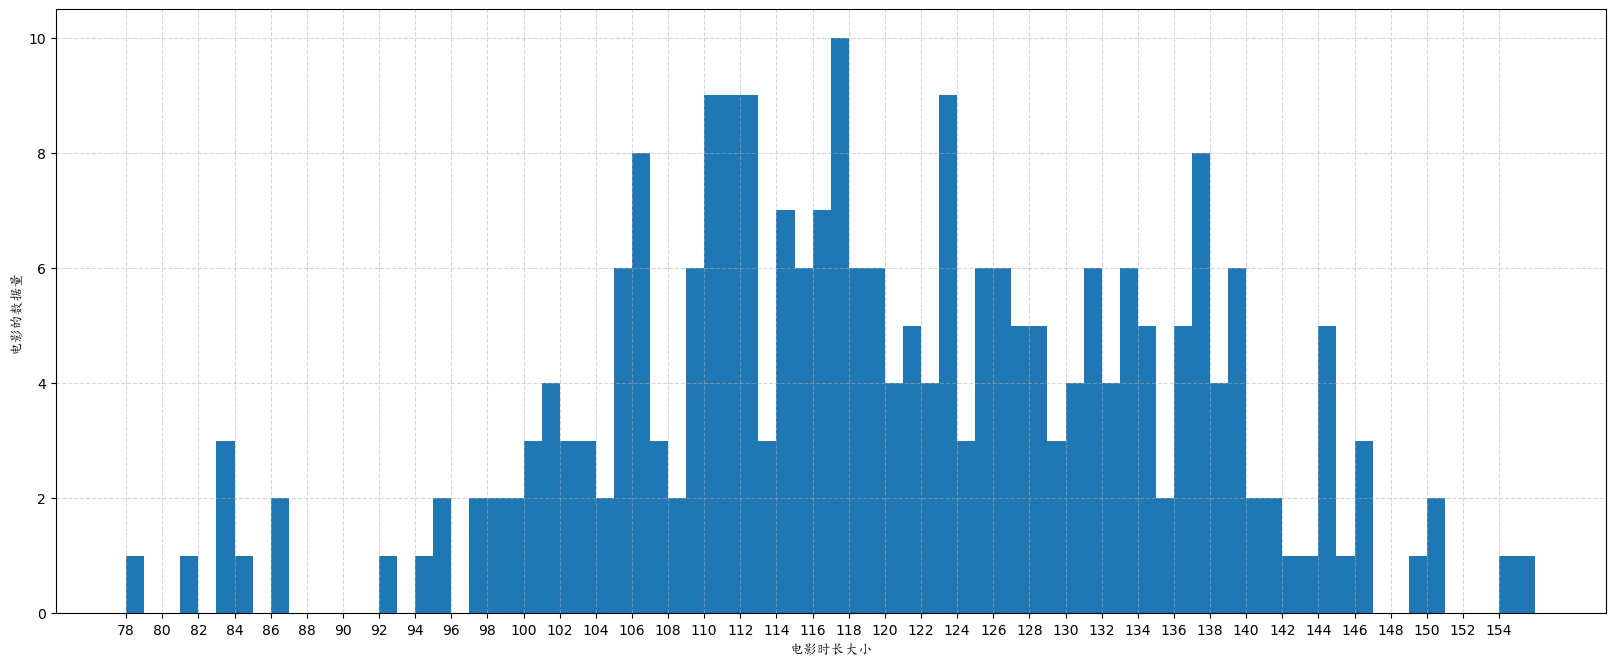

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager
time = [131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114,
        119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 
        136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 
        105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123,
        117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116,
        108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125,
        138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,
        107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 
        106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 
        111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 
        141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 
        130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 
        117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111,
        101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 
        111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=10)
# 2）创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 3）绘制直方图
# 设置组距
distance = 2
# 计算组数
group_num = int((max(time) - min(time)))
# 绘制直方图
plt.hist(time, bins=group_num)

# 修改x轴刻度显示
plt.xticks(range(min(time), max(time))[::2])

# 添加网格显示
plt.grid(linestyle="--", alpha=0.5)

# 添加x, y轴描述信息
plt.xlabel("电影时长大小",fontproperties=my_font)
plt.ylabel("电影的数据量",fontproperties=my_font)

# 4）显示图像
plt.show()

这样我们就绘制计出这些电影时长的分布状态直方图。我们看到电影时长最多的在110到112之间。
其实，绘制直方图的重点在于设置组距，然后分为若干组。用矩形的高度表示每一组数据的频数。  
那么直方图和柱形图究竟有什么区别呢。  
第一，柱形图中用柱形的高度表示各类别的数值，横轴表示类别，宽度是固定的；而直方图是用矩形的高度表示每一组的频数或频率，宽度则表示各组的组距，因此其高度与宽度均有意义。  
第二，直方图主要用于展示连续型数值型数据，所以各矩形通常是连续排列的；而柱形图主要用于展示分类型数据，常常是分开排列的。  
## 散点图
![](./picture/11-4.png)
散点图是判断变量之间是否存在数量关联趋势,展示离群点。每个点的坐标位置由变量的值决定，并由一组不连接的点完成，用于观察两种变量的相关性。例如，身高—体重、温度—维度。  
绘制直方图使用plt.scatter()函数：  
代码片段  
```
plt.scatter(x,y,s,c,marker,alpha,linewidths)
```
先来了解一下函数的常用参数：  
常用参数   
x,y：数组  
s：散点图中点的大小，可选  
c：散点图中点的颜色，可选  
marker：散点图的形状，可选  
alpha：表示透明度，在 0~1 取值，可选  
linewidths：表示线条粗细，可选  
之前我们收集4000份的身高和体重数据，数据文件的路径是./data/height_weight.csv，运行下方代码，了解数据基本情况：  
共有4000条数据，包含：height和weight两列数据。  
接下来我们绘制出身高和体重的散点图，观察两种变量的相关性。  

In [10]:
import pandas as pd
df = pd.read_csv('./data/height_weight.csv')
print(df.shape)
print(df.head())

(4000, 2)
   height   weight
0     176      155
1     170      110
2     160      122
3     163      170
4     165      110


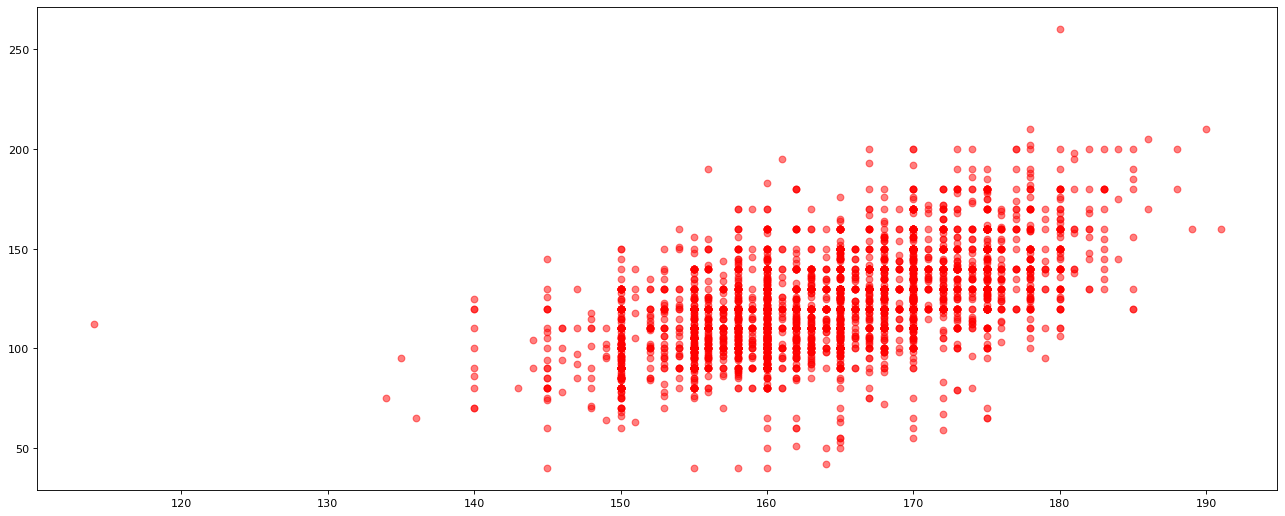

In [13]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('./data/height_weight.csv')
# 设置图形大小
plt.figure(figsize=(20,8),dpi=80)
# 使用scatter绘制散点图
# scatter 散点图
plt.scatter(df['height'],df['weight'],alpha=0.5,c='red')
plt.show()

将身高和体重数据分别作为散点图的x轴和y轴数据，并且将点的颜色设置为红色，透明度设置为0.5。这样我们就成功绘制计出身高和体重的散点图。  
通过散点图我们可以判断出，体重和身高的相关性是正相关，身高越高体重越大。
![](./picture/11-5.png)
## 饼图
![](./picture/11-6.png)
饼图是展示 分类数据的占比情况，就是反映某个部分占整体的比重，比如贫穷人口占总人口的百分比。  
饼图的整个圆代表总数据，各个扇形表示每项数据，我们可以根据扇形的角度清楚地看出每个扇形占总数据的比例。  
我们以拉勾网上海数据分析师职位数据为实验数据，数据的路径为/data/lagou.xlsx，运行下方代码，查看数据的基本情况：

In [15]:
%matplotlib inline
import pandas as pd
df = pd.read_excel('./data/lagou.xlsx')
print(df.shape)
print(df.head())

(412, 30)
   Unnamed: 0           职位名称                                     详细链接  工作地点  \
0           0    数据分析（GIS方向）  https://www.lagou.com/jobs/6352539.html   杨浦区   
1           1          数据分析师  https://www.lagou.com/jobs/6352950.html   嘉定区   
2           3  数据部-数据分析师（SH）  https://www.lagou.com/jobs/6349129.html   长宁区   
3           4          数据分析师  https://www.lagou.com/jobs/6349406.html   杨浦区   
4           5          数据分析师  https://www.lagou.com/jobs/6265017.html  浦东新区   

        薪资                公司名称   经验要求  学历                  福利  \
0  15k-20k        上海树融数据科技有限公司   3-5年  硕士               扁平化管理   
1   8k-15k      上海景域文化传播股份有限公司   3-5年  本科                 平台佳   
2  20k-30k     途家网网络技术（北京）有限公司   3-5年  硕士     发展前景好、绩效奖金、期权激励   
3  25k-50k  遨游酒店信息技术(深圳)有限责任公司  5-10年  本科  弹性上下班;团队有趣;晚餐;打车报销   
4  15k-30k    沪江教育科技（上海）股份有限公司   3-5年  本科         发展空间大，工作氛围好   

                                                职位信息  ... Unnamed: 20  \
0                                               快速成

此数据共包含412条数据，包含：职位名称、详细链接、工作地点、薪资、学历、经验等10列信息。  
那么，我们现在希望探索一下，这些招聘岗位中对不同学历要求的占比各是多少？  
绘制饼图我们使用plt.pie( )函数。  
代码片段  
```
plt.pie(x, labels, autopct, shadow, startangle)
```
先来了解一下函数的常用参数：  
常用参数  
x：绘制用到的数据  
Tlabels：用于设置饼图中每一个扇形外侧的显示说明文字  
autopct：设置饼图内百分比数据，可以使用format字符串或者format function，例如’%.1f%%’指小数点后保留1位小数  
shadow：表示是否在饼图下面画阴影，默认值：False，即不画阴影  
Tstartangle：设置起始绘制角度，默认图是从x轴正方向逆时针画起，如果设定startangle=90，则从y轴正方向画起  
下面我们来一起尝试绘制招聘岗位中不同学历的占比饼图：  

学历
不限     37
大专     18
本科    328
硕士     29
dtype: int64


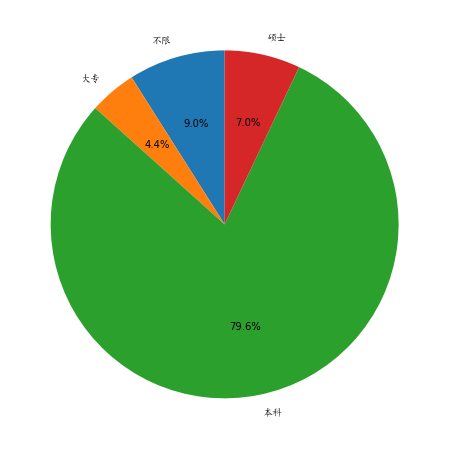

In [20]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=10)
df = pd.read_excel('./data/lagou.xlsx')
plt.figure(figsize = (10,8))
num = df.groupby('学历').size()
print(num)
# 绘制饼图
patches, l_text, p_text = plt.pie(num,labels = num.index, autopct='%.1f%%',shadow=False,startangle=90)
for t in l_text: 
    t.set_fontproperties(my_font)
plt.show()

这样我们就绘制出了一个完整的饼图，接下来，我们分析一下代码逻辑。  
df.groupby('学历').size()按照类型变量学历对原数据分组，使用groupby函数，然后计算每组数据的数据量，使用size()函数，将输出的数据记录为num。
plt.pie()会有三个返回值  
patches: matplotlib.patches.Wedge列表(扇形实例)  
l_text：label matplotlib.text.Text列表(标签实例)  
p_text：label matplotlib.text.Text列表(百分比标签实例)  
所以，在每一个扇形外侧显示中文的时候，需要获取到每一个标签实例，然后通过set_fontproperties()方法设置自定义字体。  
## 本节总结  
今天的内容就告一段落了，经过前面和本节课的学习，我们学习了如何绘制折线图、柱形图、直方图、饼图、散点图这些常见的统计图形。  
最后，我们来总结一下绘制这些图像的知识点：  
![](./picture/11-7.png)
## 下节预告
![](./picture/11-8.png)

## 题目要求
《FIFA 19》是一款由EA加拿大、EA罗马尼亚开发由艺电发行的足球电子游戏。现在我们有一份包括最新版FIFA 2019球员属性的数据，数据路径为/data/course_data/data_analysis/FIFA19.xlsx,本数据共有10000条数据，数据的基本信息如下图：  
## 题目讲解
现在根据上面的数据完成如下需求：   
1. 统计出这些球员年龄的分布状态；   
2. 统计出这些球员在球场位置的占比。   
思路：获取球员年龄列数据，用直方图绘制球员年龄的分布状态；  
计算每个位置上球员的个数，用饼图绘制球场位置的占比；    
## 书写代码


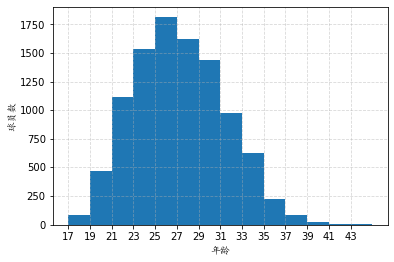

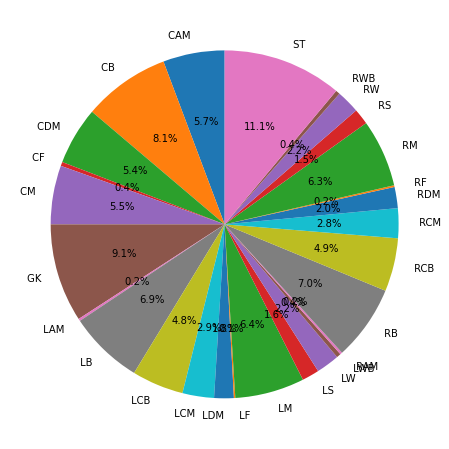

In [24]:
%matplotlib inline
#统计出这些球员年龄的分布状态参考答案：
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=10)
df = pd.read_excel('./data/FIFA19.xlsx')

age_list = df['Age'].values.tolist()
# 设置组距
distance = 2
# 计算组数
group_num = int((max(age_list) - min(age_list)) / distance)
# 用直方图绘制分布状态
plt.hist(age_list, bins=group_num)
plt.xticks(range(min(age_list), max(age_list))[::2])
# 添加网格显示
plt.grid(linestyle="--", alpha=0.5)
# 添加x, y轴描述信息
plt.xlabel("年龄",fontproperties=my_font)
plt.ylabel("球员数",fontproperties=my_font)
plt.show()


#统计出这些球员在球场位置的占比参考答案：
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_excel('./data/FIFA19.xlsx')
plt.figure(figsize = (10,8))
# 根据Position数据分组
num = df.groupby('Position').size()
plt.pie(num,labels = num.index, autopct='%.1f%%',shadow=False,startangle=90)

plt.show()

## 题目要求
俗话说：一入电商深似海，从此妹子是路人；要想让自己网店营业额增加，不仅要耐得住寂寞，还要勤总结善分析。下面是一份某电商的销售数据，数据的路径为：./data/E-Business.xlsx
## 题目讲解
现在根据上面的数据完成如下需求： 
1. 统计不同地区的总销售额。   
2. 统计各个地区的订单量的占比。   
思路：根据地区将数据进行分组，用柱状图绘制各个地区的总销售额；  
用饼图绘制订单量的占比；
## 书写代码

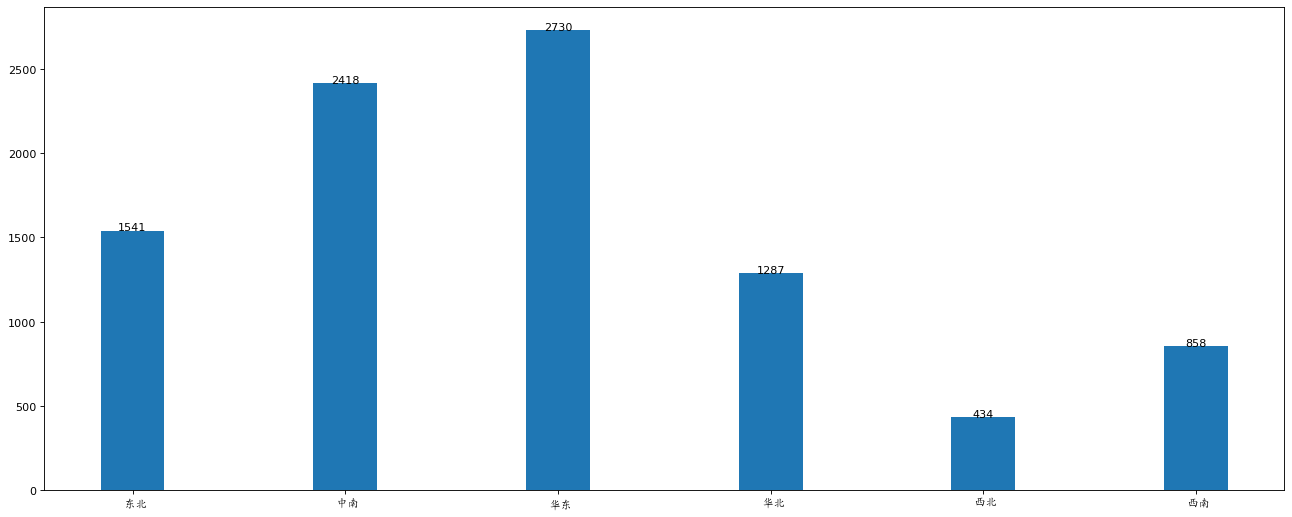

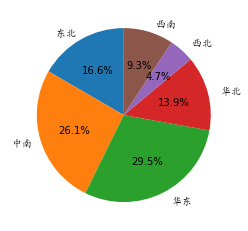

In [26]:
#不同地区的总销售额参考答案：
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=10)
df = pd.read_excel('./data/E-Business.xlsx')
num = df.groupby('地区').size()
x = num.index.tolist()
y = num.values.tolist()
plt.figure(figsize=(20,8),dpi=80)
# 绘制柱状图
rects = plt.bar(x,y,width=0.3)
plt.xticks(x,fontproperties=my_font)
# 在条形图上加标注(水平居中)
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.3, str(height),ha="center")
plt.show()

#各个地区的订单量的占比参考答案：
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=10)
df = pd.read_excel('./data/E-Business.xlsx')
df.head()
num = df.groupby('地区').size()
# 绘制饼图
patches, l_text, p_text = plt.pie(num,labels = num.index, autopct='%.1f%%',shadow=False,startangle=90)
for t in l_text: 
    t.set_fontproperties(my_font)
plt.show()